In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [5]:
df2=pd.read_csv(r"C:\Users\10725950\Downloads\alerts-data (1).csv")
label_encoder=preprocessing.LabelEncoder()

In [6]:
vectorizer=TfidfVectorizer(ngram_range=(1,3))
df2['description']=df2['description'].astype('str')
f = vectorizer.fit_transform(df2['description'])
vectorizer.get_feature_names_out()


array(['00', '00 00', '00 00 21', ..., 'zk7rp473khyf7',
       'zk7rp473khyf7 1vk65nw7tlap',
       'zk7rp473khyf7 1vk65nw7tlap xg38hcdq9nbsngmwb3z1cydccejmjsm5n1vymok0ph0otlrsidcqoels0ya'],
      dtype=object)

In [7]:
X=f
y=label_encoder.fit_transform(df2['kpi'])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=104,train_size=0.30,shuffle=True)
print(X_test)
print(X_train)
print(y_test)
print(y_train)

  (0, 3554)	1.0
  (1, 5125)	0.40902845894024903
  (1, 4597)	0.40902845894024903
  (1, 5124)	0.40902845894024903
  (1, 1645)	0.40902845894024903
  (1, 5123)	0.40902845894024903
  (1, 4596)	0.40432486800198786
  (2, 3554)	1.0
  (3, 3554)	1.0
  (4, 2984)	0.3335325036980042
  (4, 1664)	0.3335325036980042
  (4, 1871)	0.3335325036980042
  (4, 2983)	0.3335325036980042
  (4, 1663)	0.3335325036980042
  (4, 1870)	0.3335325036980042
  (4, 2982)	0.3329327802979742
  (4, 1662)	0.3335325036980042
  (4, 2059)	0.33233754925022624
  (5, 3554)	1.0
  (6, 3554)	1.0
  (7, 3554)	1.0
  (8, 3554)	1.0
  (9, 3554)	1.0
  (10, 3554)	1.0
  (11, 3554)	1.0
  :	:
  (6776, 1870)	0.3335325036980042
  (6776, 2982)	0.3329327802979742
  (6776, 1662)	0.3335325036980042
  (6776, 2059)	0.33233754925022624
  (6777, 3554)	1.0
  (6778, 3947)	0.2981720601212593
  (6778, 1634)	0.2981720601212593
  (6778, 1994)	0.2981720601212593
  (6778, 4649)	0.2981720601212593
  (6778, 3946)	0.2981720601212593
  (6778, 1633)	0.2981720601212593


In [9]:
classifier_rf = RandomForestClassifier(random_state=42,n_estimators=100)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred=classifier_rf.predict(X_test)
y_pred
label_encoder.inverse_transform(y_pred)
label_encoder.classes_

array(['AD Site Availability Health Degraded',
       'AD Site Performance Health Degraded',
       'ASA Site-2-Site VPN Tunnel State', 'Access Points Status',
       'Agent Host Running Status', 'BGP Change',
       'BizTalk Service Status', 'CPU Utilization', 'CTS Node Down',
       'Client IP Conflict Detected', 'Cluster Node Availability',
       'Cluster Service Shutdown', 'DC Hardware Component State',
       'DC PS Failure', 'Database ROWS Data is Out of Space',
       'Disk Space too low', 'Exchange Health', 'F5-LB Group State',
       'Failed to Connect to Computer', 'Hardware Component State',
       'Heartbeat Status Linux', 'Heartbeat Status Windows',
       'High Receive Percent Utilization - Critical 90%',
       'High Response Time', 'High Transmit Percent Utilization',
       'Hospital Nodes Down', 'IIS Application Pool Availability ',
       'IIS Website Availability', 'Internet Alert', 'LA Agent Status',
       'Logical Disk Free Space is too low',
       'Logical Fre

In [11]:
accuracy = accuracy_score(y_test,y_pred)
c_matrix = classification_report(y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.04%


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 

In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
data={'Rating':[1,2,3,4,5],
      'Discount':[10,20,30,40,50],
      'Sales':[100,200,300,400,500]}
df=pd.DataFrame(data)
X=df[['Rating']]
y=df['Sales']


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
y_pred


array([300.])

In [15]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
print(report)


Accuracy: 100.00%
              precision    recall  f1-score   support

         300       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [16]:
import matplotlib.pyplot as plot
import seaborn as sn

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


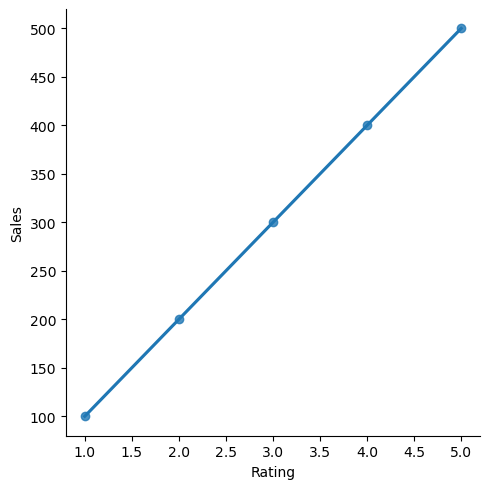

In [17]:
sn.lmplot(x='Rating',y='Sales',data=df)

In [18]:
reg.coef_

array([100.])

In [19]:
reg.predict(X_test)

array([300.])

In [20]:
import joblib


In [21]:
joblib.dump(reg,'model.joblib')

['model.joblib']

In [22]:
from sklearn.metrics import r2_score

In [23]:
df1=pd.read_csv(r"C:\Users\10725950\Downloads\QWE_sales_data.csv")

In [24]:
df1['a'] = df1['rating_count'].str.replace(',', '').astype(float)


In [25]:
df1['col'] = df1['discount_percentage'].str.rstrip('%').astype('float') 
df2=df1.fillna(0)
X=df2[['col','rating']]
y=df2['a']


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=140,test_size=0.2)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
y_pred

array([ 18724.71193704,  26467.53599485,  22647.49143019,  15963.01557636,
        19998.06012526,  21883.0008098 ,  21538.98003062,  18827.44686553,
         9646.43783085,  18368.7524933 ,  18571.81381297,  10613.98977091,
        18686.48740602,  21309.6328445 ,  13122.46161634,  17630.54773935,
        23029.73674039,  19080.67138079,  16598.48540182,  14434.03433558,
        21132.85739128,   2350.3694807 ,  20915.44886974,  20647.8771526 ,
        17489.58827984,  19286.14123777,  14434.03433558,  21094.63286026,
        11913.62382558,  17451.36374882,  17401.20055323,  22494.59330611,
        20953.67340076,  17439.42508425,  17974.56851853,  16127.85236501,
        20100.79505375,  18559.87514839,  15286.91268258,  15007.40230087,
        20303.85637342,  19324.36576879,  22341.69518203,  22991.51220937,
        14242.91168048,  15783.83158583,  19642.10068152,   5088.18851224,
        23373.75751956,  18012.79304955,  17527.81281086,  11454.92945335,
        20991.89793178,  

In [27]:
accuracy = r2_score(y_test,y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 1.67%


C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


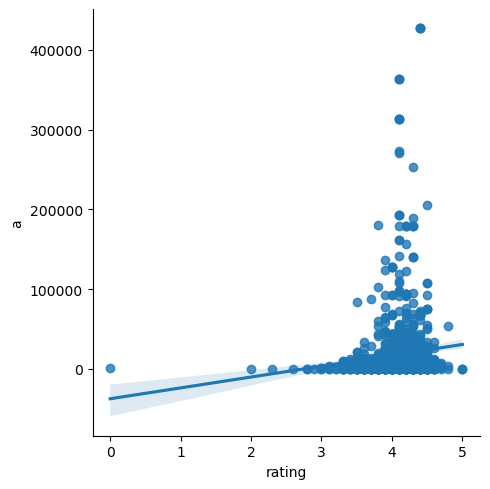

In [28]:
sn.lmplot(x='rating',y='a',data=df2)

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [30]:
df3 = pd.read_csv(r"C:\Users\10725950\Downloads\XYZ_sales_data (1).csv")

In [31]:

df3 = df3[['Customer_Age','Product_Category']]
data_encoded = pd.get_dummies(df3, columns=['Customer_Age','Product_Category'])
print(data_encoded)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
kmeans = KMeans(n_clusters=3)
df3['Cluster'] = kmeans.fit_predict(data_scaled)

        Customer_Age_17  Customer_Age_18  Customer_Age_19  Customer_Age_20  \
0                 False            False             True            False   
1                 False            False             True            False   
2                 False            False            False            False   
3                 False            False            False            False   
4                 False            False            False            False   
...                 ...              ...              ...              ...   
113031            False            False            False            False   
113032            False             True            False            False   
113033            False             True            False            False   
113034            False            False            False            False   
113035            False            False            False            False   

        Customer_Age_21  Customer_Age_22  Customer_Age_23  Cust

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

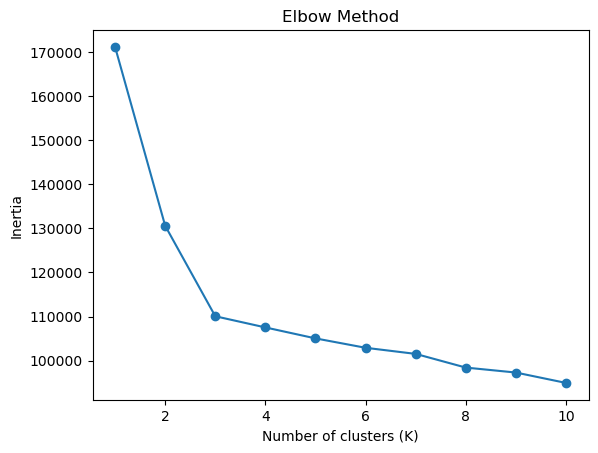

In [33]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,marker = 'o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

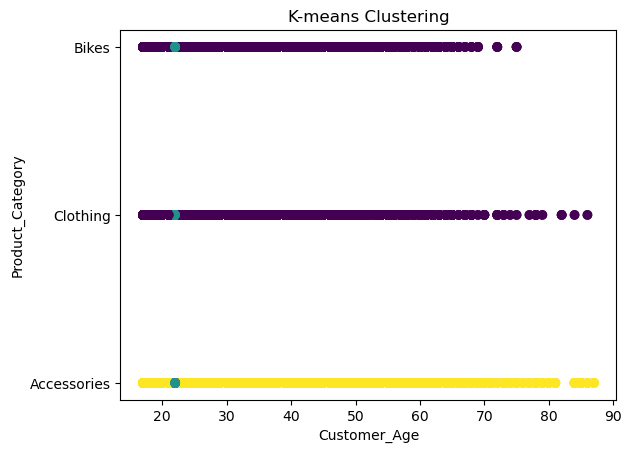

In [34]:
plt.scatter(df3['Customer_Age'],df3['Product_Category'],c=df3['Cluster'],cmap='viridis')
plt.xlabel('Customer_Age')
plt.ylabel('Product_Category')
plt.title('K-means Clustering')
plt.show()

In [35]:
df4 = pd.read_csv(r"C:\Users\10725950\Downloads\alerts-data (1).csv")


In [36]:
vectorizer=TfidfVectorizer(ngram_range=(3,3))
df4['description']=df4['description'].astype('str')
f = vectorizer.fit_transform(df4['description'])
print(f)


  (0, 1311)	0.3333333333333333
  (0, 1443)	0.3333333333333333
  (0, 741)	0.3333333333333333
  (0, 1261)	0.3333333333333333
  (0, 1367)	0.3333333333333333
  (0, 1505)	0.3333333333333333
  (0, 1441)	0.3333333333333333
  (0, 1586)	0.3333333333333333
  (0, 743)	0.3333333333333333
  (1, 1084)	0.25463511761339075
  (1, 1363)	0.2570831658745347
  (1, 638)	0.30275176004346627
  (1, 23)	0.3598037964227227
  (1, 768)	0.3598037964227227
  (1, 1626)	0.3598037964227227
  (1, 1935)	0.25463511761339075
  (1, 1181)	0.25463511761339075
  (1, 1460)	0.25463511761339075
  (1, 714)	0.25463511761339075
  (1, 2064)	0.25463511761339075
  (1, 2149)	0.25463511761339075
  (2, 2358)	0.3197638862187066
  (2, 1588)	0.3197638862187066
  (2, 881)	0.3197638862187066
  (2, 867)	0.3197638862187066
  :	:
  (9683, 527)	0.16676960886853373
  (9683, 199)	0.16685783682454197
  (9683, 453)	0.16685783682454197
  (9683, 1156)	0.16685783682454197
  (9683, 1582)	0.16685783682454197
  (9683, 1124)	0.16685783682454197
  (9683, 2205

In [37]:
scaler = StandardScaler(with_mean=False)
data_scaled = scaler.fit_transform(f)
kmeans = KMeans(n_clusters=5)
df4['Cluster'] = kmeans.fit_predict(f)


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


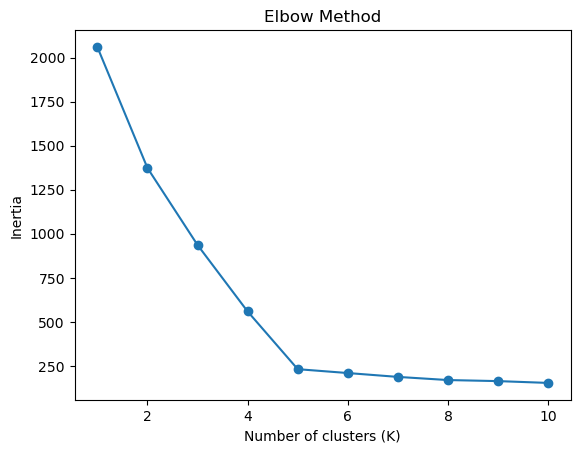

In [38]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(f)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,marker = 'o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

C:\Users\10725950\AppData\Local\Temp\ipykernel_20452\684263997.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df4['description'].index,df4['Cluster'],cmap='viridis')


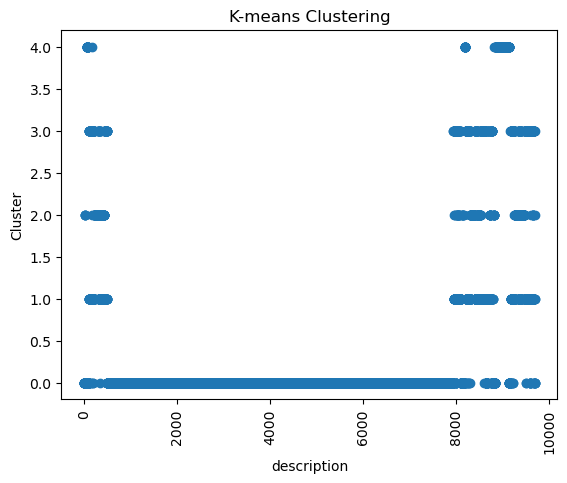

In [40]:
plt.scatter(df4['description'].index,df4['Cluster'],cmap='viridis')
plt.xticks(rotation=90)
plt.xlabel('description')
plt.ylabel('Cluster')
plt.title('K-means Clustering')
plt.show()